In [2]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1: Install Python GEKKO and Change Options
# https://www.youtube.com/watch?v=NJaJPgZZFZ0&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=1

m = GEKKO(remote=False)
y = m.Var(value = 2)
m.Equation(y**2==1)
m.options.SOLVER=1 # APOPT
m.solve()
print(y.value)

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  1
   Intermediates:  0
   Connections  :  0
   Equations    :  1
   Residuals    :  1
 
 Number of state variables:    1
 Number of total equations: -  1
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    0
 
 ----------------------------------------------
 Steady State Optimization with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  5.62500E-21  3.75000E-01
    1  5.06250E-22  1.40625E-01
    2  6.09849E-24  1.26562E-02
    3  9.29223E-28  1.52462E-04
    4  9.29223E-28  1.52462E-04
 Successful solution
 
 ---------------------------------------------------
 Solver  

In [4]:
# 2: Solving Linear Equations in Python
# https://www.youtube.com/watch?v=K8e7i5CqVTc&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=2

m = GEKKO(remote=False)
x = m.Var()
y = m.Var()
m.Equation(3*x+2*y==1)
m.Equation(x+2*y==0)
m.solve(disp=False)
print(x.VALUE, y.VALUE)

A = np.array([[3,2],[1,2]])
b = np.array([1,0])
z = np.linalg.solve(A,b)
print(z)

[0.5] [-0.25]
[ 0.5  -0.25]


In [5]:
m = GEKKO(remote=False)
x = m.Var()
y = m.Var()
z = m.Var()
m.Obj(x**2)
m.Equation(3*x+2*y==1)
m.Equation([x+2*y<0,x+z==0])
m.solve(disp=False)
print(x.VALUE, y.VALUE, z.VALUE)

[0.49999999531] [-0.24999999297] [-0.49999999531]


In [6]:
# 3: Solve Nonlinear Equations
# https://www.youtube.com/watch?v=CzWdejCDOAg&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=3

m = GEKKO(remote=False)
x = m.Var(value=-1)
y = m.Var(value=1)
m.Obj(-x)
m.Equation(x+2*y==0)
m.Equation(x**2+y**2<1)
m.solve(disp=False)
print(x.VALUE, y.VALUE)

[0.89442719547] [-0.44721359773]


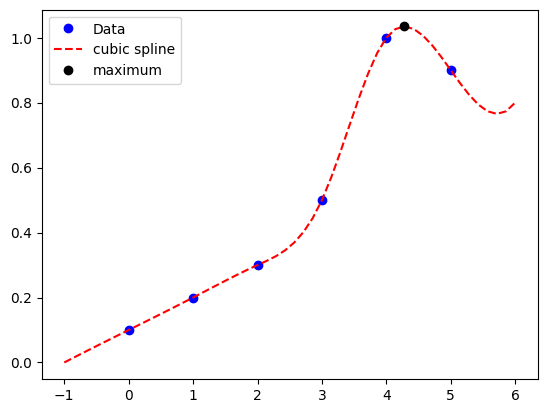

In [7]:
# 4: Cubic Spline in Python GEKKO
# https://www.youtube.com/watch?v=lZEI36_Bsv4&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=4

xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,1.0,0.9])

m = GEKKO(remote=False)
x = m.Param(value=np.linspace(-1,6))
y = m.Var()
m.cspline(x,y,xm,ym)
m.options.IMODE = 2
m.solve(disp=False)

p = GEKKO(remote=False)
px = p.Var(value=1,lb=0,ub=5)
py = p.Var()
p.Obj(-py)
p.cspline(px,py,xm,ym)
p.solve(disp=False)

plt.plot(xm,ym,'bo',label='Data')
plt.plot(x.VALUE,y.VALUE,'r--',label="cubic spline")
plt.plot(px,py,"ko",label="maximum")
plt.legend()
plt.show()

Text(0, 0.5, 'y')

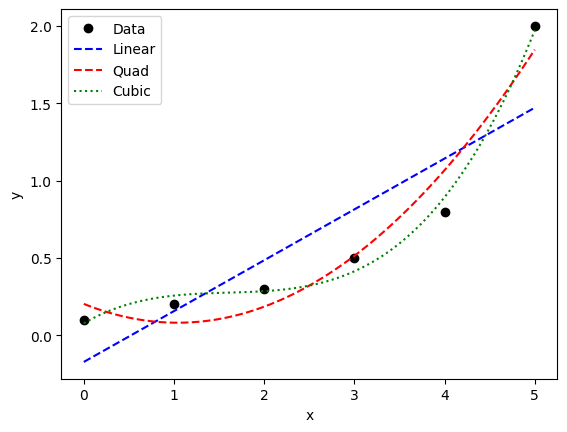

In [8]:
# 5: Linear and Polynomial Regression
# https://www.youtube.com/watch?v=P7lHkcKrn1k&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=5

xm = np.array([0,1,2,3,4,5])
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

m = GEKKO(remote=False)
m.options.IMODE = 2

c = [m.FV(value=0) for i in range(4)]
x = m.Param(value=xm)
y = m.CV(value=ym)
y.FSTATUS = 1
m.Equation(y==c[0]+c[1]*x+c[2]*x**2+c[3]*x**3)

c[0].STATUS = 1
c[1].STATUS = 1
m.options.EV_TYPE = 2
m.solve(disp=False)
p1 = [c[1].VALUE[0],c[0].VALUE[0]]

c[2].STATUS = 1
m.solve(disp=False)
p2 = [c[2].VALUE[0],c[1].VALUE[0],c[0].VALUE[0]]

c[3].STATUS = 1
m.solve(disp=False)
p3 = [c[3].VALUE[0],c[2].VALUE[0],c[1].VALUE[0],c[0].VALUE[0]]

xp = np.linspace(0,5,100)

# plot data
plt.plot(xm, ym, "ko", label="Data")
plt.plot(xp,np.polyval(p1,xp),"b--",label="Linear")
plt.plot(xp,np.polyval(p2,xp),"r--",label="Quad")
plt.plot(xp,np.polyval(p3,xp),"g:",label="Cubic")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")

0.60237974435 -0.033095664603


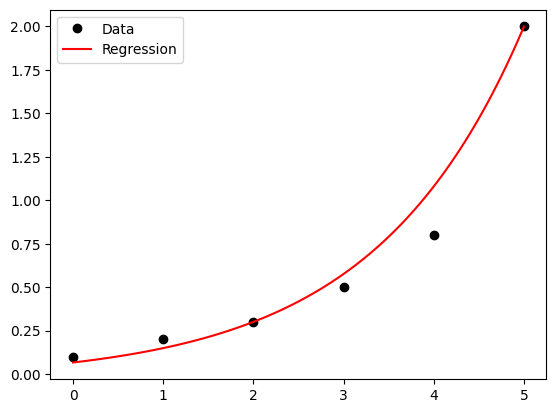

In [9]:
# 6: Nonlinear Regression
# https://www.youtube.com/watch?v=VKl3b2Z-78U&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=6&pp=iAQB

# measurements
xm = np.array([0,1,2,3,4,5])    
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

m = GEKKO(remote=False)
m.options.IMODE = 2

x = m.Param(value=xm)
a = m.FV(value=0.1)
a.STATUS = 1
b = m.FV(value=0)
b.STATUS = 1

y = m.CV(value=ym)
y.FSTATUS = 1

m.Equation(y==0.1*m.exp(a*x)+b)
m.solve(disp=False)

print(a.value[0], b.value[0])

xp = np.linspace(0,5,100)
p1 = 0.1*np.exp(a.value[0]*xp)+b.value[0]

plt.plot(xm,ym,"ko",label="Data")
plt.plot(xp,p1, "r-", label="Regression")
plt.legend()

0.55362955248 0.0030830738109


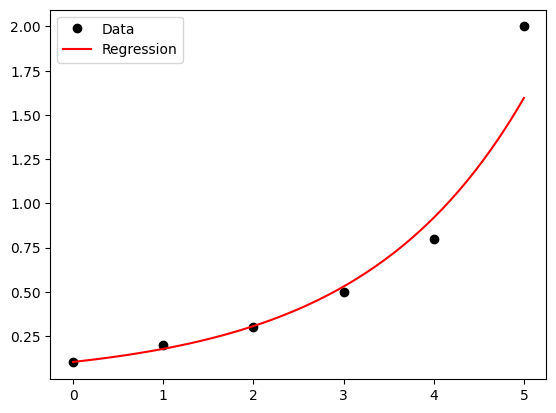

In [10]:
# Nonlinear Regression part 2 (with objective function)
# https://www.youtube.com/watch?v=VKl3b2Z-78U&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=6&pp=iAQB

# measurements
xm = np.array([0,1,2,3,4,5])    
ym = np.array([0.1,0.2,0.3,0.5,0.8,2.0])

m = GEKKO(remote=False)
m.options.IMODE = 2

x = m.Param(value=xm)
a = m.FV(value=0.1)
a.STATUS = 1
b = m.FV(value=0)
b.STATUS = 1

yp = m.Param(value=ym)
y = m.Var()

m.Obj(((yp-y)/yp)**2)

m.Equation(y==0.1*m.exp(a*x)+b)
m.solve(disp=False)

print(a.value[0], b.value[0])

xp = np.linspace(0,5,100)
p1 = 0.1*np.exp(a.value[0]*xp)+b.value[0]

plt.plot(xm,ym,"ko",label="Data")
plt.plot(xp,p1, "r-", label="Regression")
plt.legend()

In [11]:
# 7. Machine Learning with Neural Network
# https://www.youtube.com/watch?v=kOmhU2XxLCY&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=7

# generate training data
x = np.linspace(0.0, 2*np.pi, 20)
y = np.sin(x)

# size with hyberbolic tangent function
select = False
nin = 1     # inputs
n1 = 2      # hidden layer 1 (linear)
n2 = 3      # hidden layer 2 (nonlinear)
n3 = 2      # hidden layer 3 (linear)
nout = 1    # outputs

# Size with cosine function
# select = False
# nin = 1     # inputs
# n1 = 2      # hidden layer 1 (linear)
# n2 = 3      # hidden layer 2 (nonlinear)
# n3 = 2      # hidden layer 3 (linear)
# nout = 1    # outputs

# Initialize gekko
train = GEKKO(remote=False)
test = GEKKO(remote=False)

model = [train,test]

for m in model:
    # input(s)
    m.inpt = m.Param()

    # layer 1
    m.w1 = m.Array(m.FV, (nin,n1))
    m.l1 = [m.Intermediate(m.w1[0,i]*m.inpt) for i in range(n1)]

    # layer 2
    m.w2a = m.Array(m.FV, (n1,n2))
    m.w2b = m.Array(m.FV, (n1,n2))

    if select:
        m.l2 = [m.Intermediate(sum(m.cos(m.w2a[j,i]+m.w2b[j,i]*m.l1[j]) for j in range(n1) for i in range(n2)))]
    else:
        m.l2 = [m.Intermediate(sum(m.tanh(m.w2a[j,i]+m.w2b[j,i]*m.l1[j]) for j in range(n1) for i in range(n2)))]

    # layer 3
    m.w3 = m.Array(m.FV, (n2,n3))
    # m.l3 = [m.Intermediate(sum(m.w3[j,i]*m.l2[j] for j in range(n2))) for i in range(n3)]

# i dont know whats happening, im skipping this part

In [12]:
# 8. Solve differential equations
# https://www.youtube.com/watch?v=xOzjeBaNfgo&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=8

tm = np.linspace(0,20,100)
m = GEKKO(remote=False)
m.time = tm
k = 10
y = m.Var(value=5.0)
t = m.Param(value=tm)
m.Equation(k*y.dt()==-t*y)
m.options.IMODE = 4
m.solve(disp=False)

In [13]:
from scipy.integrate import odeint

def model(y,t):
    dydt = -t*y/k
    return dydt

y_odeint = odeint(model,5.0,tm)

In [14]:
ya = 5.0 * np.exp(-tm**2/(2*k))

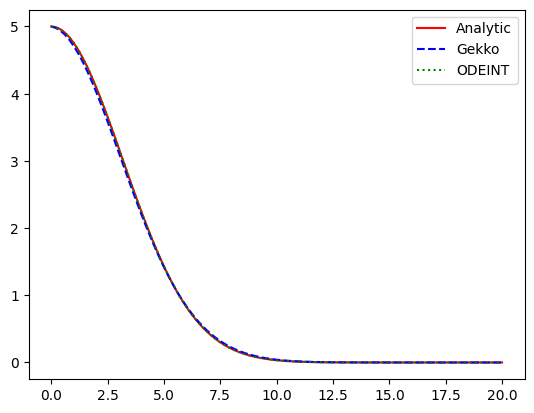

In [15]:
plt.plot(tm, ya, "r-", label="Analytic")
plt.plot(tm, y.VALUE, "b--", label="Gekko")
plt.plot(tm, y_odeint, "g:", label="ODEINT")
plt.legend()

In [16]:
# 9. Numerical optimization
# https://www.youtube.com/watch?v=onMqBj-IgR0&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=9

m = GEKKO(remote=False)
m.options.SOLVER = 3
# m.solver_options = ["linear_solver ma97"]

x1 = m.Var(value=1, lb=1, ub=5)
x2 = m.Var(value=5, lb=1, ub=5)
x3 = m.Var(value=5, lb=1, ub=5)
x4 = m.Var(value=1, lb=1, ub=5)
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==40)
m.Obj(x1*x4*(x1+x2+x3)+x3)
m.solve(disp=False)

print("x1:", x1.value[0])
print("x2:", x2.value[0])
print("x3:", x3.value[0])
print("x4:", x4.value[0])

x1: 1.000000057
x2: 4.74299963
x3: 3.8211500283
x4: 1.3794081795


In [17]:
# 10: Discrete optimization
# https://www.youtube.com/watch?v=vwKBHmryQWE&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=10

m = GEKKO(remote=False)
m.options.SOLVER = 1
m.solver_options = ["minlp_maximum_iterations 500", \
                    "minlp_gap_tol 0.01" \
                    "nlp_maximum_iterations 50"]
x1 = m.Var(value=1,lb=1,ub=5)
x2 = m.Var(value=5,lb=1,ub=5)
x3 = m.Var(value=5,lb=1,ub=5, integer=True)
x4 = m.Var(value=1,lb=1,ub=5, integer=True)

m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==40)
m.Obj(x1*x4*(x1+x2+x3)+x3)
m.solve(disp=False)

print("x1:", x1.value[0])
print("x2:", x2.value[0])
print("x3:", x3.value[0])
print("x4:", x4.value[0])

x1: 1.3589086474
x2: 4.5992789966
x3: 4.0
x4: 1.0


x1 1


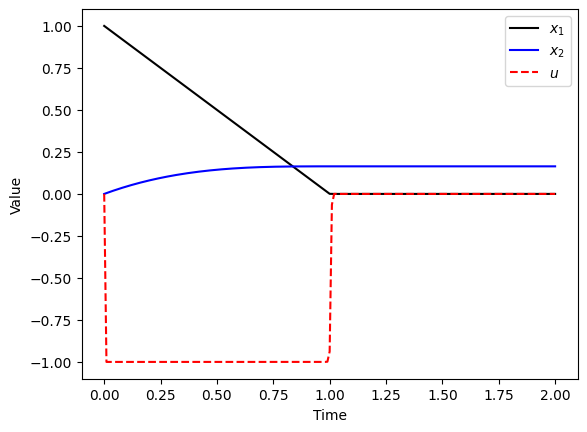

[1.0, 0.98999999995, 0.9799999999, 0.96999999984, 0.95999999979, 0.94999999975, 0.9399999997, 0.92999999965, 0.91999999961, 0.90999999956, 0.89999999952, 0.88999999948, 0.87999999944, 0.8699999994, 0.85999999936, 0.84999999933, 0.83999999929, 0.82999999926, 0.81999999923, 0.8099999992, 0.79999999917, 0.78999999914, 0.77999999912, 0.7699999991, 0.75999999908, 0.74999999906, 0.73999999904, 0.72999999903, 0.71999999902, 0.70999999901, 0.69999999901, 0.689999999, 0.679999999, 0.669999999, 0.65999999901, 0.64999999902, 0.63999999903, 0.62999999905, 0.61999999907, 0.60999999909, 0.59999999912, 0.58999999915, 0.57999999919, 0.56999999923, 0.55999999928, 0.54999999933, 0.53999999939, 0.52999999945, 0.51999999952, 0.5099999996, 0.49999999968, 0.48999999977, 0.47999999987, 0.46999999998, 0.46000000009, 0.45000000022, 0.44000000036, 0.4300000005, 0.42000000066, 0.41000000084, 0.40000000102, 0.39000000122, 0.38000000144, 0.37000000167, 0.36000000192, 0.35000000219, 0.34000000249, 0.33000000281, 0.

In [21]:
# 11: Optimal control
# https://www.youtube.com/watch?v=egQAKdJsu7E&list=PLLBUgWXdTBDjxcpH9hRuq-bsm_ti2UvoB&index=11

m = GEKKO() # initialize gekko
nt = 201
m.time = np.linspace(0,2,nt)
# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)
u = m.Var(value=0,lb=-1,ub=1)
p = np.zeros(nt) # mark final time point
p[-1] = 1.0
final = m.Param(value=p)
# Equations
m.Equation(x1.dt()==u)  
m.Equation(x2.dt()==0.5*x1**2)

m.Obj(x2*final) # Objective function
m.options.IMODE = 6 # optimal control mode
m.solve(disp=False) # solve

plt.figure(1) # plot results
plt.plot(m.time,x1.value,'k-',label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',label=r'$x_2$')
plt.plot(m.time,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()